In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("data/mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## EDA

In [5]:
#describing all the features
df.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#checking null values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df["veil-type"].value_counts()

p    8124
Name: veil-type, dtype: int64

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

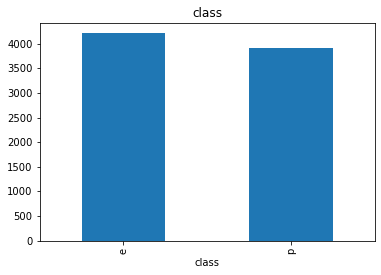

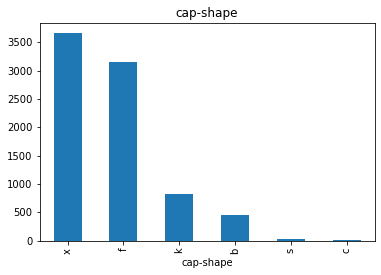

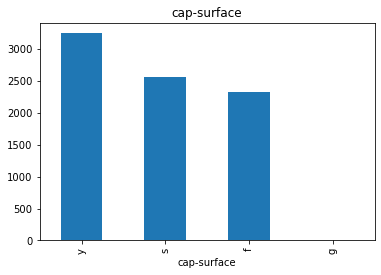

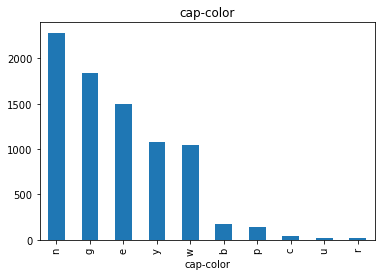

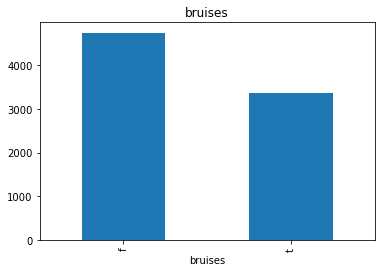

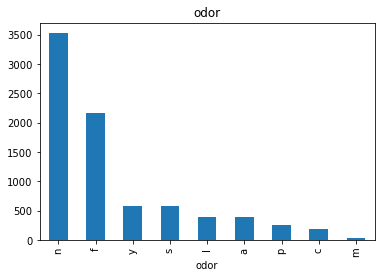

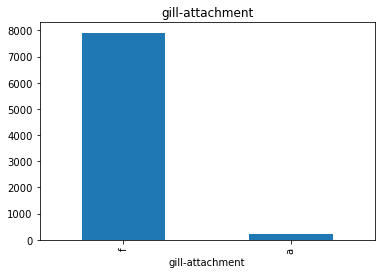

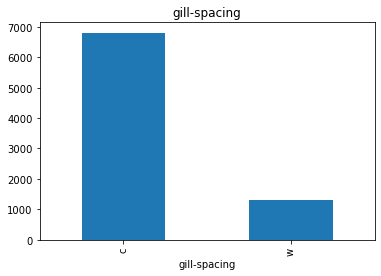

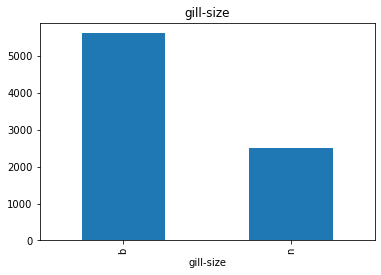

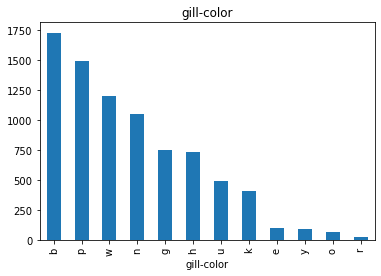

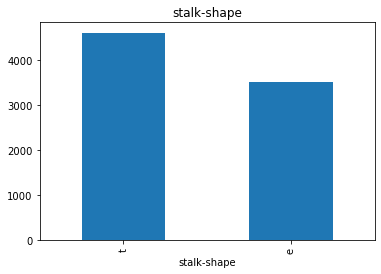

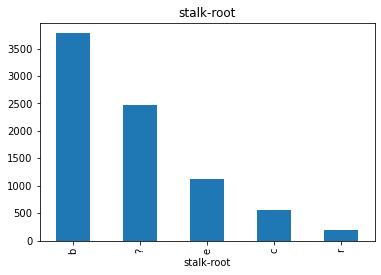

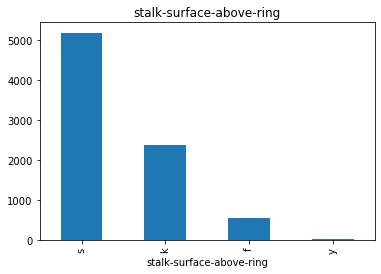

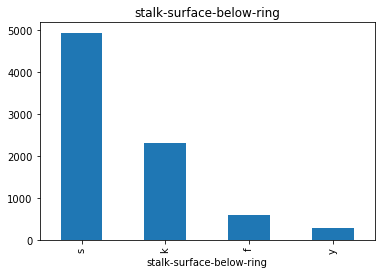

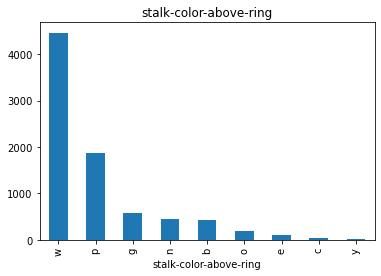

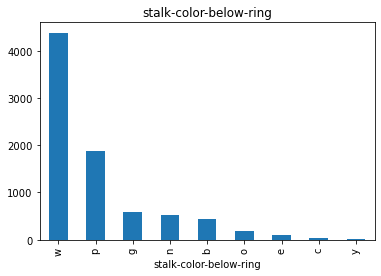

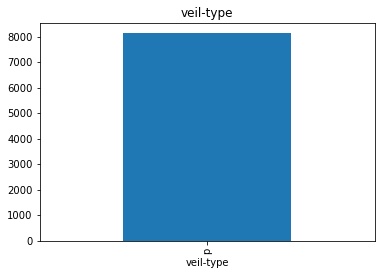

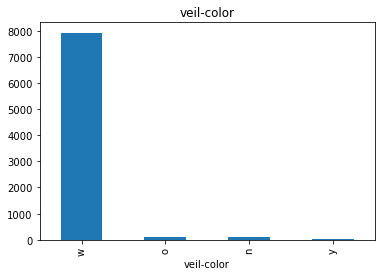

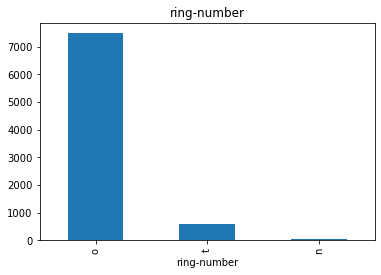

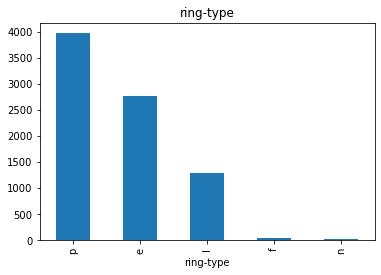

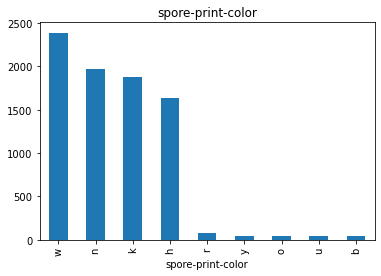

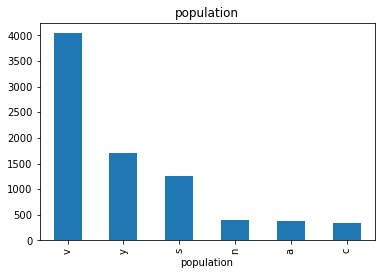

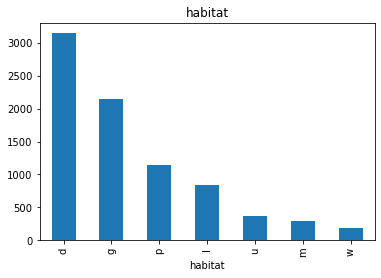

In [10]:
#creating bar graph for each feature
for feat in df.columns:
    df[feat].value_counts().plot(kind="bar")
    plt.title(feat)
    plt.xlabel(feat)
    print('\n')
    plt.show()

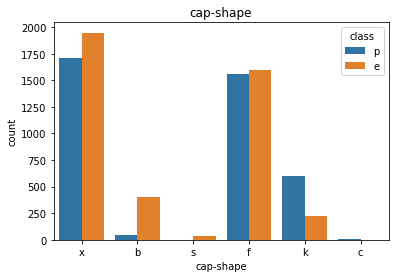

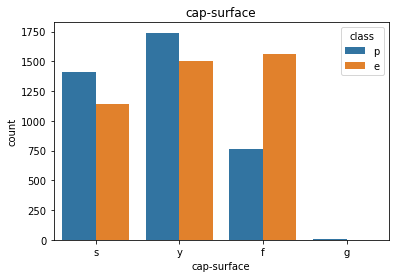

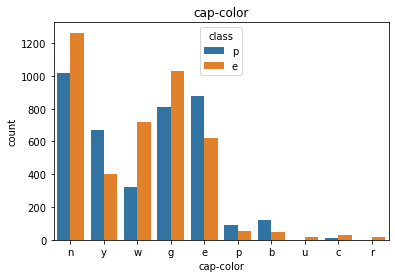

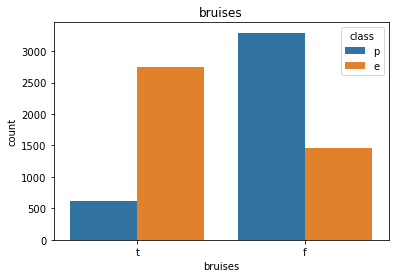

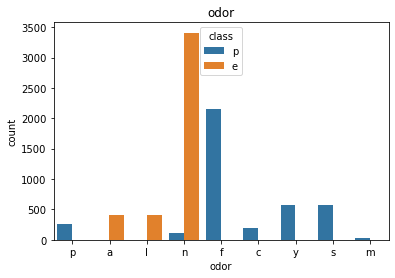

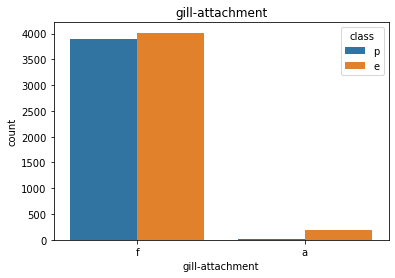

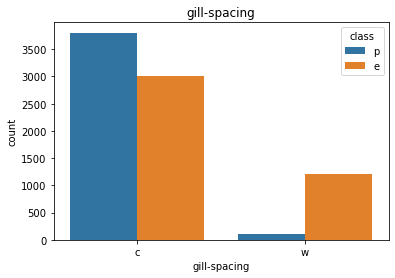

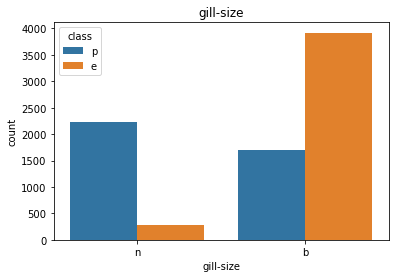

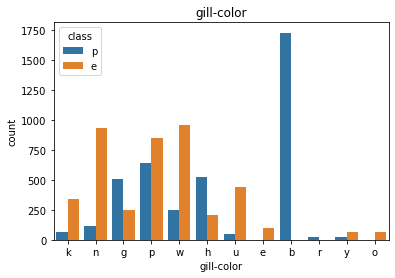

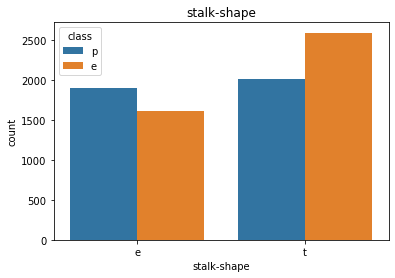

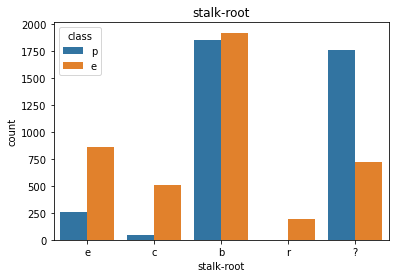

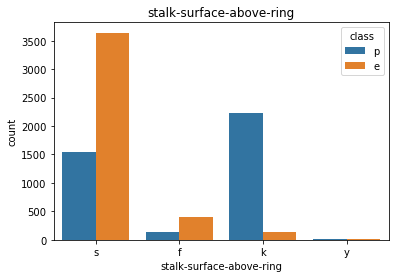

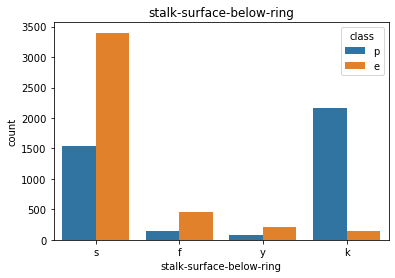

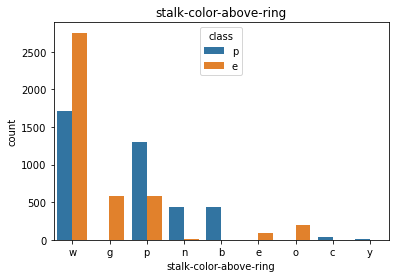

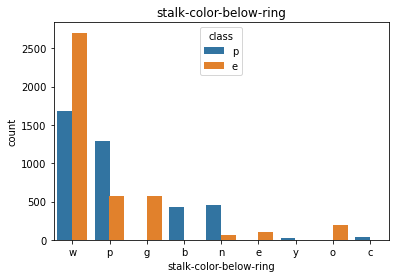

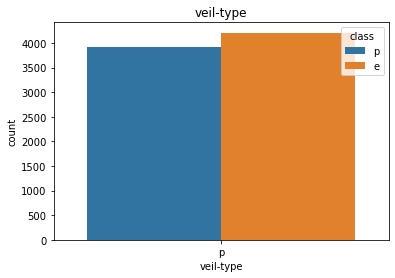

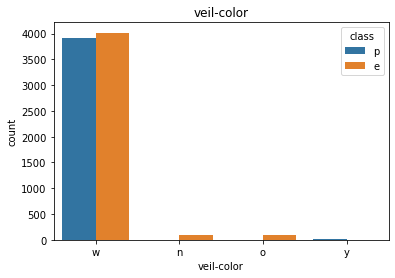

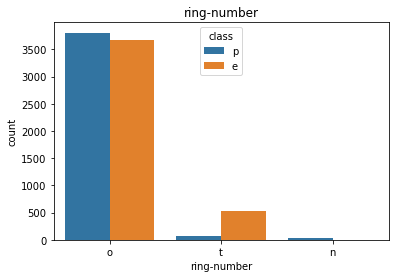

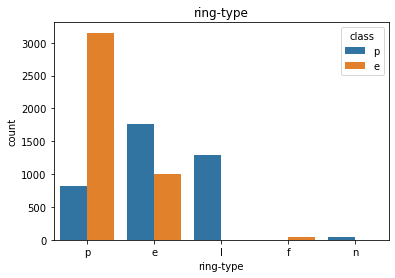

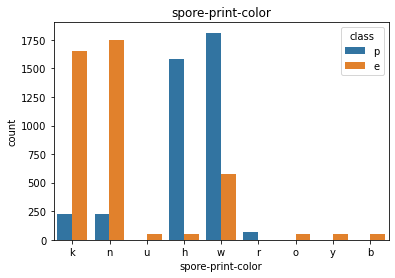

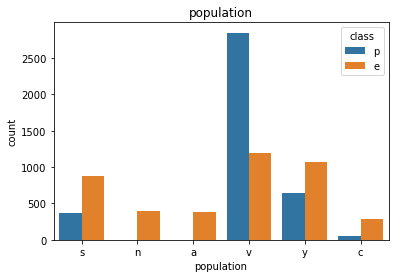

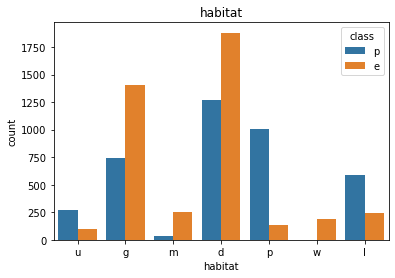

In [11]:
#Creating countplot for each feature with hue=class
for feat in df.columns[1:]:
    sns.countplot(df[feat], hue=df["class"])
    plt.title(feat)
    plt.show()

C:\Users\Abhishek\Desktop\Project\evn\lib\site-packages\phik\data_quality.py:78: UserWarning: Not enough unique value for variable veil-type for analysis 1. Dropping this column
  warnings.warn(


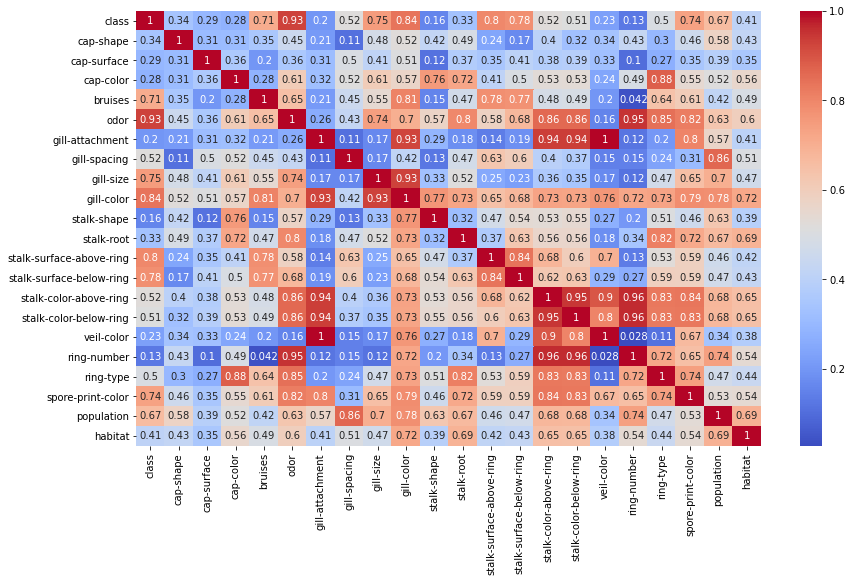

In [12]:
#ploting correlation using phik correlation
plt.subplots(figsize=(14,8))
sns.heatmap(df.phik_matrix(), annot=True, cmap="coolwarm")

#### After EDA
1. All features of this dataset is categorical so we have to handle this.
2. Most of the features is highly correlated to each other.
3. There is no missing values.
4. One of the feature which is `veil-type` is having a constant value so we have to drop that column.
5. It's a blanced dataset


In [5]:
#droping veil-type
df.drop("veil-type",axis=1, inplace=True)

In [6]:
#fuction for taking highly correlated columns
def correlation(data,threshold):
    
    col_corr = set()
    corr_matrix = data.phik_matrix()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >= threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
                
    return col_corr

In [7]:
highly_corr_columns = correlation(df,0.85)
highly_corr_columns

{'gill-color',
 'odor',
 'population',
 'ring-number',
 'ring-type',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color'}

In [8]:
#droping all the highly correlated columns

df.drop(list(highly_corr_columns),axis=1, inplace=True)

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,spore-print-color,habitat
0,p,x,s,n,t,f,c,n,e,e,s,s,k,u
1,e,x,s,y,t,f,c,b,e,c,s,s,n,g
2,e,b,s,w,t,f,c,b,e,c,s,s,n,m
3,p,x,y,w,t,f,c,n,e,e,s,s,k,u
4,e,x,s,g,f,f,w,b,t,e,s,s,n,g


In [10]:
#converting categorical value into numerical using ordinal number encoding
for feat in df.columns:
    ind = df[feat].value_counts().index
    dic = {j:i for i,j in enumerate(ind,0)}
    df[feat] = df[feat].map(dic)

In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,spore-print-color,habitat
0,1,0,1,0,1,0,0,1,1,2,0,0,2,4
1,0,0,1,3,1,0,0,0,1,3,0,0,1,1
2,0,3,1,4,1,0,0,0,1,3,0,0,1,5
3,1,0,0,4,1,0,0,1,1,2,0,0,2,4
4,0,0,1,1,0,0,1,0,0,2,0,0,1,1


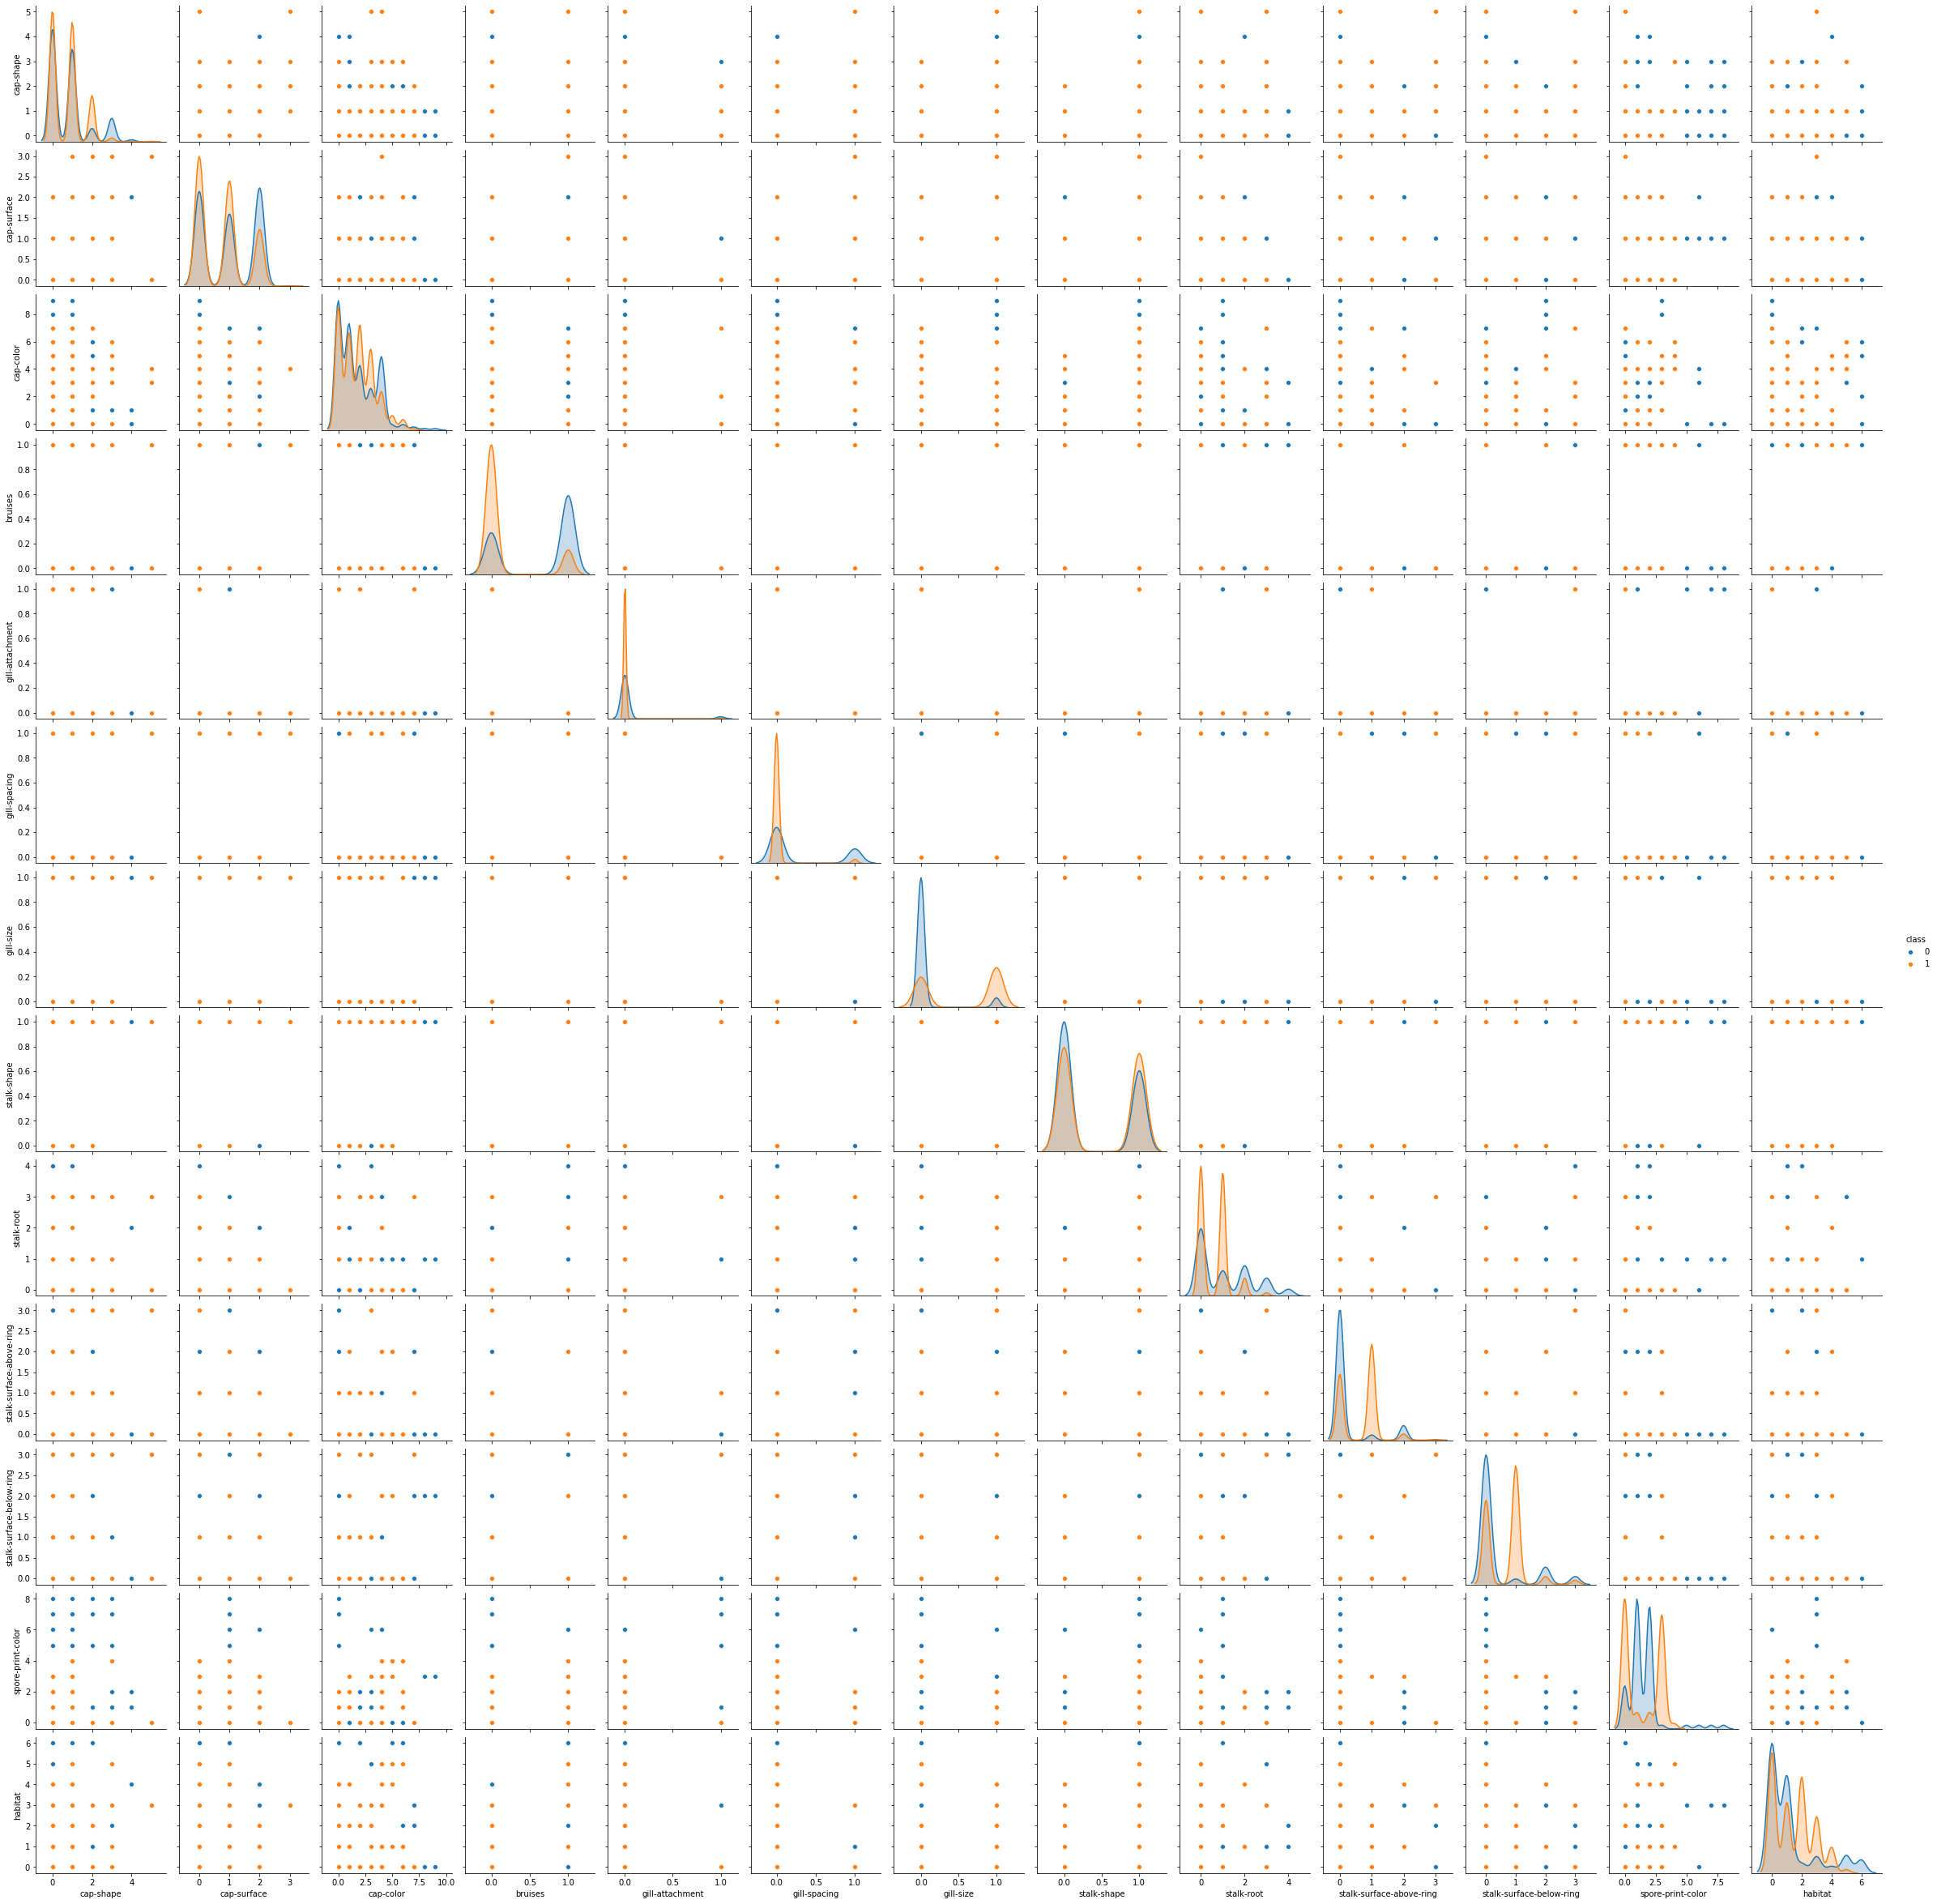

In [12]:
sns.pairplot(df,hue="class")

In [13]:
X = df.drop("class",axis=1)
y = df["class"]

In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
#importing logistic regression
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
#checking scores
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

[[1268    4]
 [   0 1166]]


In [17]:
#Saving model
import pickle
pickle.dump(model, open("Mushroom_classification","wb"))